In [1]:
#import modules:
import mogreps
import netCDF4
from pathlib import Path
#(module for transforming coordinate systems)
import cartopy.crs as ccrs

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

Code to extract the list of keys for the different variables.

In [2]:
#first realisation:
f = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk',2013,2,1,3,0,3),data_folder=Path('.')  )

#mogreps.make_data_object_name
data_set = netCDF4.Dataset(f)
data_set.variables.keys()

odict_keys(['wet_bulb_potential_temperature', 'rotated_latitude_longitude', 'time', 'pressure', 'grid_latitude', 'grid_longitude', 'forecast_period', 'forecast_reference_time', 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas', 'time_0', 'forecast_period_0', 'cloud_area_fraction_assuming_maximum_random_overlap', 'stratiform_snowfall_rate', 'time_1', 'forecast_period_1', 'wet_bulb_freezing_level_altitude', 'time_2', 'forecast_period_2', 'air_pressure_at_sea_level', 'air_temperature', 'pressure_0', 'air_temperature_0', 'height', 'air_temperature_1', 'time_3', 'time_3_bnds', 'forecast_period_3', 'forecast_period_3_bnds', 'air_temperature_2', 'dew_point_temperature', 'fog_area_fraction', 'geopotential_height', 'pressure_1', 'high_type_cloud_area_fraction', 'low_type_cloud_area_fraction', 'medium_type_cloud_area_fraction', 'relative_humidity', 'relative_humidity_0', 'specific_humidity', 'stratiform_rainfall_amount', 'forecast_period_4', 'forecast_period

Look at specific variables.

In [3]:
#print( data_set.variables.keys() ) 

"""
for k in data_set.variables.keys() : 
    print("key = " + str(k))
    value = data_set.variables[k][0]
    print(value)
"""

    
print( type( data_set.variables ['air_temperature_2'][0] )  ) 

<class 'numpy.ma.core.MaskedArray'>


Some functions to pull out the data. (to put these in a Python script at a later date). 

In [34]:
def Month_Map(month_str) : 

    """
    Function to converty months as 3 letter strings to
    corresponding int between 0 and 11.
    month_str : str
    """
    
    Month_Dict = { "Jan" : 0,  "Feb" : 1, "Mar" : 2, "Apr" : 3 , "May" : 4, "Jun" : 5, "Jul" : 6 , "Aug" : 7 , "Sep" : 8, "Oct" : 9 , "Nov" : 10 , "Dec" : 11}
    
    return Month_Dict[month_str]


def Pull_Out_Location_Array(variable_name,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period) : 
    
    
    num_ensemble_members = 12
    
    Property_Array = [ ]
    
    for i in range(num_ensemble_members) : 
        f = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk',year,Month_Map(month),day,hour,i,forecast_period),data_folder=Path('.')  )
        data_set = netCDF4.Dataset(f)
        value = data_set.variables[variable_name][0][grid_loc_1][grid_loc_2]
        Property_Array.append(value)
    
    return Property_Array


def Plot_Variables_Against(variable_1,variable_2,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period) : 
    
    """
    Plot two variables at a specified location against each other.
    
    """
    
    array_1 =  Pull_Out_Location_Array(variable_1,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period)
    array_2 = Pull_Out_Location_Array(variable_2,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period)
    
    plt.scatter(array_1,array_2)
    plt.title( str(year) + " " + month + " " + str(day) + " at " + str(hour) + "H at location " + str((grid_loc_1,grid_loc_2)) )
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.show()

import time   
def Plot_Variance_in_Property(variable_name,year,month,day,hour,forecast_period) : 

    """
    
    Plot the variance in a given property across the ensembles
    for a given time period.
    
    """
    
    x_len = 547
    y_len = 420
    
    x_len = 10
    y_len = 10
    
    x_range = np.arange(200,210)
    y_range = np.arange(200,210)
    
    #emptry array for matrix values:
    Value_Matrix = np.zeros( (547,420) )
    
    for i in x_range : 
        for j in y_range : 
            print("i=" + str(i) + "j=" + str(j))
            time.sleep(1)
            Property_Array = Pull_Out_Location_Array(variable_name,i,j,year,month,day,hour,forecast_period)
            Value_Matrix[i][j] = np.var(Property_Array)
            print("Variance = " + str(np.var(Property_Array)) )


        fig = plt.figure()
        #First subplot in a 1x1 grid
        ax = fig.add_subplot(111)
        plt.pcolormesh(Value_Matrix,cmap='brg')

        rotation = data_set['rotated_latitude_longitude']
        transform=ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,pole_latitude=rotation.grid_north_pole_latitude)
        projection = transform


        fig = plt.figure(figsize=(20,10))
        #create an axis instance:
        ax = fig.add_subplot(111,projection=projection)
        pcm = ax.pcolormesh(data_set['grid_longitude'],data_set['grid_latitude'],Value_Matrix,transform=transform)
        ax.coastlines(resolution='10m')
        #ax.colorbar()
        fig.colorbar(pcm)
        #fig.colorbar.set_label("a")

        
        plt.show()

    
    

i=200j=200
Variance = 0.19824219
i=200j=201
Variance = 0.18088107
i=200j=202
Variance = 0.19650607
i=200j=203
Variance = 0.2173394
i=200j=204
Variance = 0.18880208
i=200j=205
Variance = 0.22135417
i=200j=206
Variance = 0.18348522
i=200j=207
Variance = 0.1079644
i=200j=208
Variance = 0.10970052
i=200j=209
Variance = 0.09722223


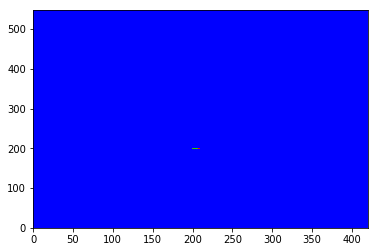

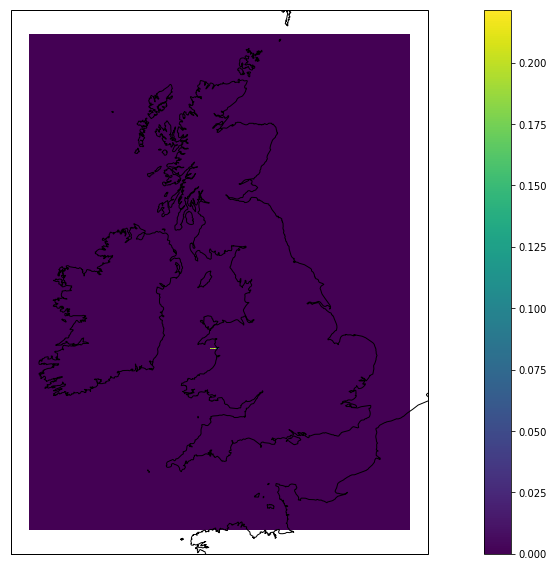

i=201j=200
Variance = 0.20431857
i=201j=201
Variance = 0.17664929
i=201j=202
Variance = 0.18880208
i=201j=203
Variance = 0.19227429
i=201j=204
Variance = 0.19129772
i=201j=205
Variance = 0.2251519
i=201j=206
Variance = 0.22135417
i=201j=207
Variance = 0.23784721
i=201j=208
Variance = 0.15917969
i=201j=209
Variance = 0.16699219


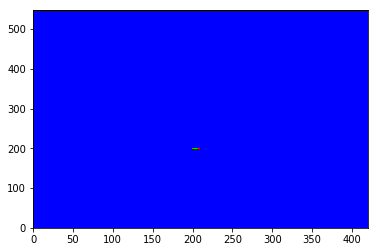

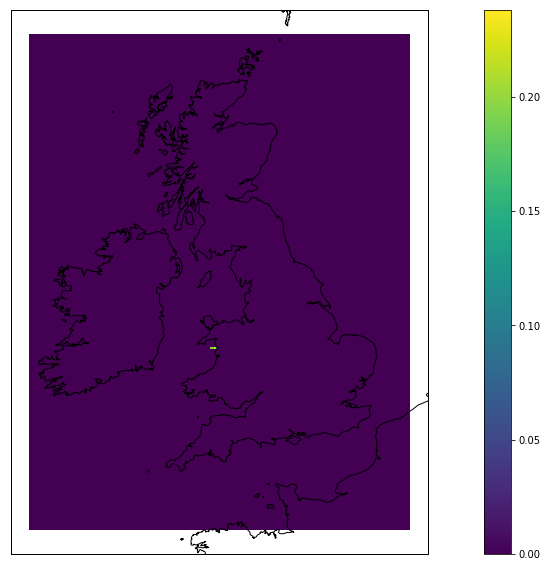

i=202j=200
Variance = 0.1796875
i=202j=201
Variance = 0.17664929
i=202j=202
Variance = 0.18880208
i=202j=203
Variance = 0.18522136
i=202j=204
Variance = 0.19097221
i=202j=205
Variance = 0.19911022
i=202j=206
Variance = 0.18869357
i=202j=207
Variance = 0.12098523
i=202j=208
Variance = 0.18229167
i=202j=209
Variance = 0.16883679


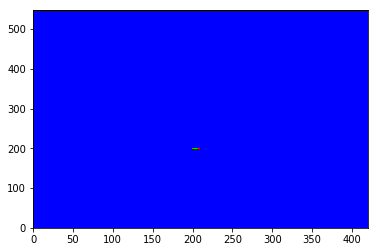

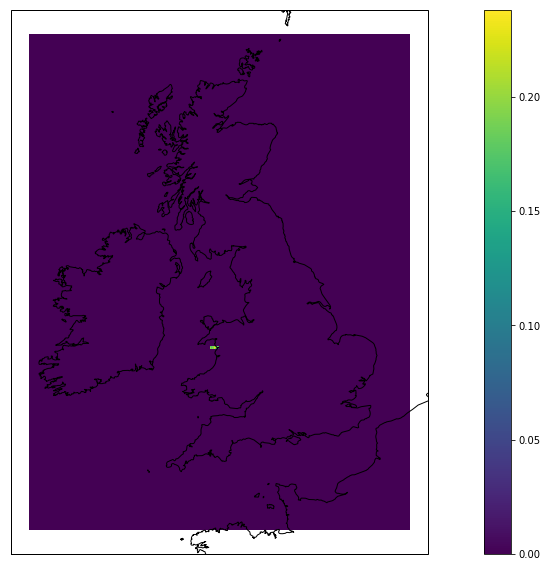

i=203j=200
Variance = 0.18088107
i=203j=201
Variance = 0.18261719
i=203j=202
Variance = 0.17220052
i=203j=203
Variance = 0.1860894
i=203j=204
Variance = 0.16753471
i=203j=205
Variance = 0.13758679
i=203j=206
Variance = 0.080729164
i=203j=207
Variance = 0.12630208
i=203j=208
Variance = 0.17144096
i=203j=209
Variance = 0.19227429


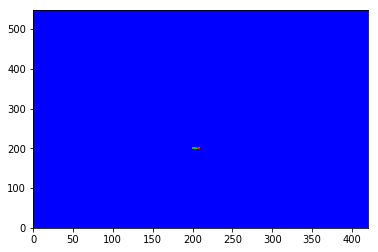

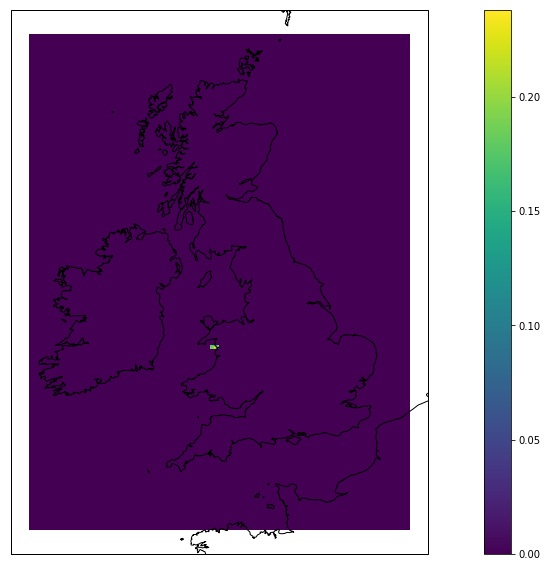

i=204j=200
Variance = 0.17925346
i=204j=201
Variance = 0.18261719
i=204j=202
Variance = 0.16699219
i=204j=203
Variance = 0.1860894
i=204j=204
Variance = 0.17220052
i=204j=205
Variance = 0.11838106
i=204j=206
Variance = 0.067708336
i=204j=207
Variance = 0.11284721
i=204j=208
Variance = 0.17013888
i=204j=209
Variance = 0.17925346


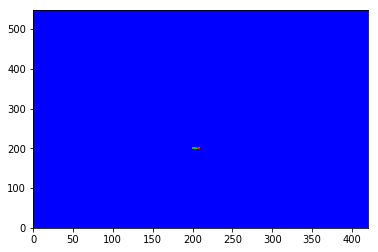

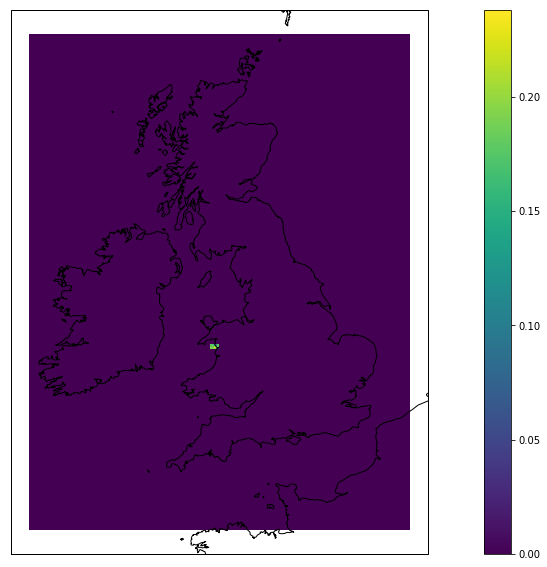

i=205j=200
Variance = 0.15060763
i=205j=201
Variance = 0.15744357
i=205j=202
Variance = 0.16623263
i=205j=203
Variance = 0.16786022
i=205j=204
Variance = 0.1470269
i=205j=205
Variance = 0.1796875
i=205j=206
Variance = 0.05588108
i=205j=207
Variance = 0.15972221
i=205j=208
Variance = 0.13661022
i=205j=209
Variance = 0.19097221


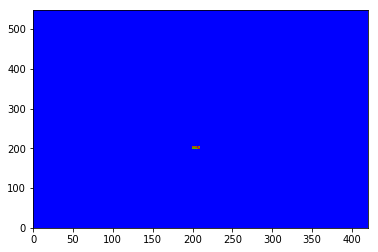

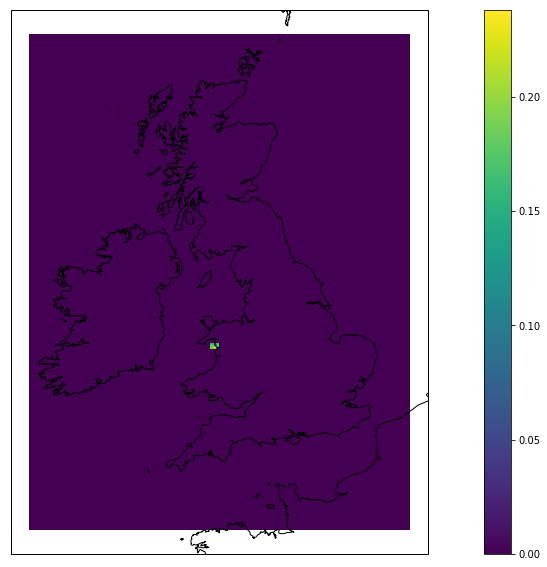

i=206j=200
Variance = 0.16786022
i=206j=201
Variance = 0.16525607
i=206j=202
Variance = 0.17925346
i=206j=203
Variance = 0.16525607
i=206j=204
Variance = 0.1860894
i=206j=205
Variance = 0.12760417
i=206j=206
Variance = 0.1157769
i=206j=207
Variance = 0.08105469
i=206j=208
Variance = 0.11935762
i=206j=209
Variance = 0.16786022


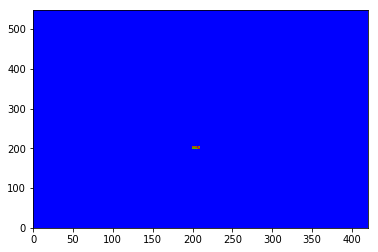

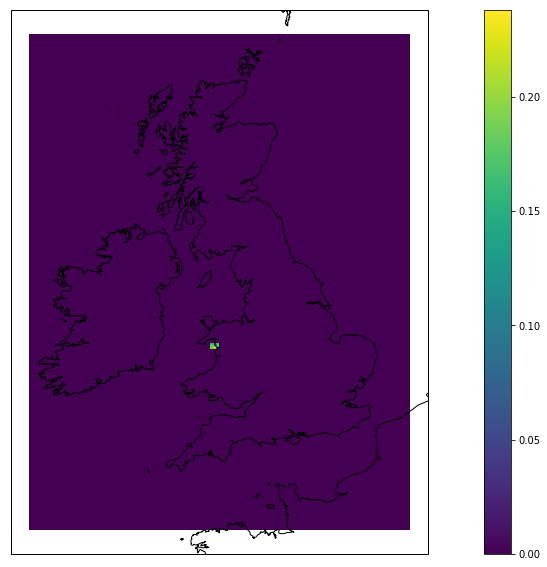

i=207j=200
Variance = 0.16786022
i=207j=201
Variance = 0.17306857
i=207j=202
Variance = 0.17925346
i=207j=203
Variance = 0.1392144
i=207j=204
Variance = 0.0859375
i=207j=205
Variance = 0.062065974
i=207j=206
Variance = 0.09407552
i=207j=207
Variance = 0.052408855
i=207j=208
Variance = 0.1157769
i=207j=209
Variance = 0.16786022


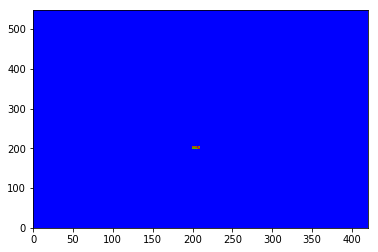

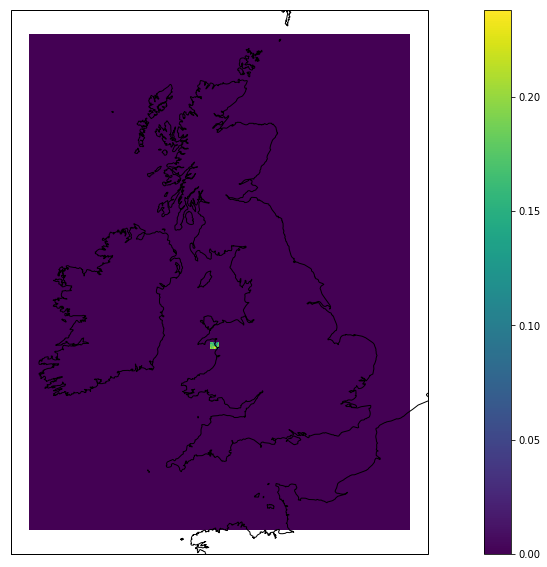

i=208j=200
Variance = 0.16927083
i=208j=201
Variance = 0.17306857
i=208j=202
Variance = 0.14442272
i=208j=203
Variance = 0.12098523
i=208j=204
Variance = 0.10894096
i=208j=205
Variance = 0.12977429
i=208j=206
Variance = 0.06890191
i=208j=207
Variance = 0.06282552
i=208j=208
Variance = 0.11751302
i=208j=209
Variance = 0.16786022


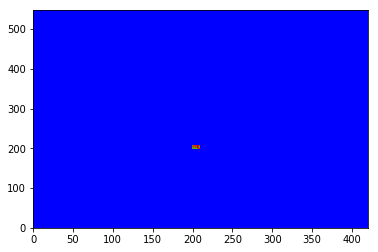

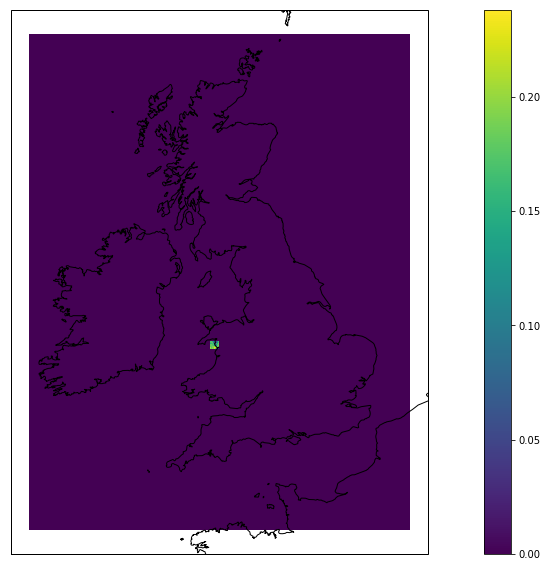

i=209j=200
Variance = 0.14930554
i=209j=201
Variance = 0.14149304
i=209j=202
Variance = 0.125
i=209j=203
Variance = 0.108072914
i=209j=204
Variance = 0.106770836
i=209j=205
Variance = 0.08626302
i=209j=206
Variance = 0.08626302
i=209j=207
Variance = 0.057617188
i=209j=208
Variance = 0.20572917
i=209j=209
Variance = 0.13574219


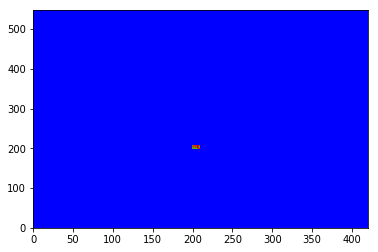

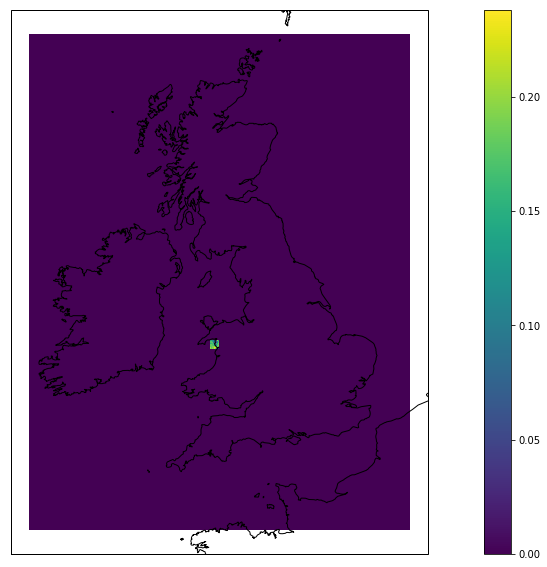

In [35]:
import numpy as np

#cycle over the different cells and plot the variance in each case: 
Plot_Variance_in_Property('air_temperature_2',2013,"May",1,3,3)

File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already 

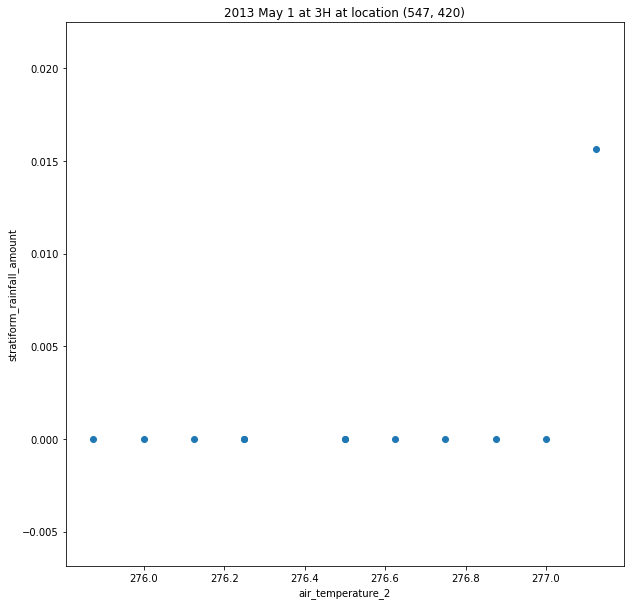

File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already 

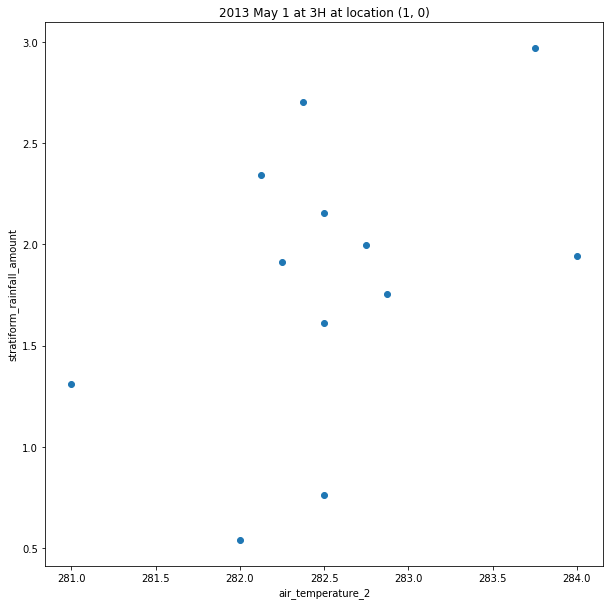

In [76]:
Plot_Variables_Against('air_temperature_2','stratiform_rainfall_amount',547,420,2013,"May",1,3,3)
Plot_Variables_Against('air_temperature_2','stratiform_rainfall_amount',1,0,2013,"May",1,3,3)

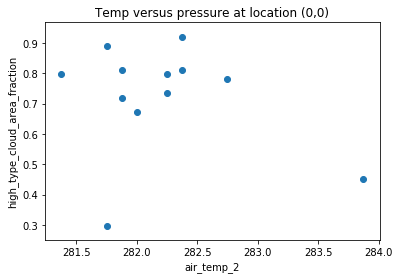

In [30]:
plt.scatter(air_temps,pressures)
plt.title("Temp versus pressure at location (0,0)")
plt.xlabel("air_temp_2")
plt.ylabel("high_type_cloud_area_fraction")
plt.show()

(array([1., 2., 3., 0., 2., 1., 0., 0., 0., 1.]),
 array([281.375, 281.625, 281.875, 282.125, 282.375, 282.625, 282.875,
        283.125, 283.375, 283.625, 283.875]),
 <a list of 10 Patch objects>)

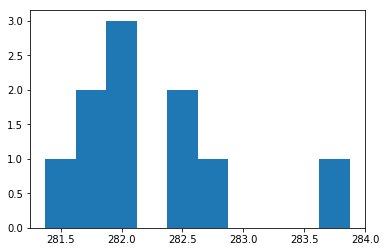

In [7]:
plt.hist(air_temps)